# Introduction  
* This dataset contains a record for patients showing for their medical appointments, you have a set of features that are self-explanatory and a label **No-show**, predict whether a patient will show for his appointment or not.

* You are **ENCOURAGED** to copy code from the internet, use Github Co-pilot, ask chat GPT, ask me, ask other students. but don't copy the whole project, **I will know**, and you will get zero. and the person who gave it to you. As long as you prove to me that you put in the effort, I will give you full mark. 

* The outlines here are **NOT Questions**, they are designed to guide you, but you are free to remove them and deal with the data as you see. 

* The results of the model are not important, as long as show me the predictions on the test set, that you understand the code you ***supposedly*** wrote, and justify the steps you have taken, you will get full mark.

* Try to solve the bonus questions, to get a bonus.

# The Training Phase

#### Import pandas and all the necessary libraries.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *

#### Load the dataset, split it into 70% training set and 30% test set.
save the training set in a file called training.csv, and the test set in a file called test.csv. don't forget to shuffle the dataframe before splitting.
**Hint:** don't `use train_test_split()`, instead, use pandas `iloc[]` function.

In [3]:
df = pd.read_csv('D:\Data\data-visualization\Appointment dataset.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# shuffle the DataFrame rows
df = df.sample(frac = 1)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
38517,4.787866e+13,5559030,F,2016-04-08T07:17:55Z,2016-05-09T00:00:00Z,5,MARIA ORTIZ,0,0,0,0,0,0,No
36132,8.923293e+12,5718923,F,2016-05-19T10:19:47Z,2016-05-19T00:00:00Z,62,FRADINHOS,1,1,1,0,0,0,No
20485,3.627964e+13,5681726,M,2016-05-10T15:01:41Z,2016-05-10T00:00:00Z,19,MARUÍPE,0,0,0,0,0,0,No
31508,8.519980e+14,5576736,F,2016-04-13T08:54:06Z,2016-05-19T00:00:00Z,7,SANTA TEREZA,0,0,0,0,0,0,No
55654,9.155823e+12,5695718,M,2016-05-13T10:47:18Z,2016-05-19T00:00:00Z,30,SÃO CRISTÓVÃO,0,0,0,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 38517 to 103358
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


# Splitting Data With iloc[]

In [9]:
train_df = df.iloc[:int(0.7*len(df)),:]
test_df = df.iloc[int(0.7*len(df)):,:]
train_df.shape, test_df.shape

((77368, 14), (33159, 14))

# Saving training and testing data

In [11]:
train_df.to_csv(r'D:\Machine_Learning\projects\training-appointment-instructions.csv')
test_df.to_csv(r'D:\Machine_Learning\projects\testing-appointment-instructions.csv')

#### Load the file training.csv that you saved in a new data frame.

In [14]:
training = pd.read_csv(r'D:\Machine_Learning\projects\training-appointment-instructions.csv',index_col=0)
training.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
38517,4.787866e+13,5559030,F,2016-04-08T07:17:55Z,2016-05-09T00:00:00Z,5,MARIA ORTIZ,0,0,0,0,0,0,No
36132,8.923293e+12,5718923,F,2016-05-19T10:19:47Z,2016-05-19T00:00:00Z,62,FRADINHOS,1,1,1,0,0,0,No
20485,3.627964e+13,5681726,M,2016-05-10T15:01:41Z,2016-05-10T00:00:00Z,19,MARUÍPE,0,0,0,0,0,0,No
31508,8.519980e+14,5576736,F,2016-04-13T08:54:06Z,2016-05-19T00:00:00Z,7,SANTA TEREZA,0,0,0,0,0,0,No
55654,9.155823e+12,5695718,M,2016-05-13T10:47:18Z,2016-05-19T00:00:00Z,30,SÃO CRISTÓVÃO,0,0,0,0,0,0,No


#### View information about the dataset.

In [15]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77368 entries, 38517 to 97132
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       77368 non-null  float64
 1   AppointmentID   77368 non-null  int64  
 2   Gender          77368 non-null  object 
 3   ScheduledDay    77368 non-null  object 
 4   AppointmentDay  77368 non-null  object 
 5   Age             77368 non-null  int64  
 6   Neighbourhood   77368 non-null  object 
 7   Scholarship     77368 non-null  int64  
 8   Hipertension    77368 non-null  int64  
 9   Diabetes        77368 non-null  int64  
 10  Alcoholism      77368 non-null  int64  
 11  Handcap         77368 non-null  int64  
 12  SMS_received    77368 non-null  int64  
 13  No-show         77368 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 8.9+ MB


In [16]:
training.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.736800e+04,7.736800e+04,77368.000000,77368.000000,77368.000000,77368.000000,77368.000000,77368.000000,77368.000000
mean,1.473662e+14,5.675437e+06,37.096345,0.098620,0.197291,0.071903,0.030646,0.022257,0.321903
std,2.562135e+14,7.153976e+04,23.125974,0.298152,0.397956,0.258329,0.172357,0.161890,0.467209
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.139345e+12,5.640368e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680750e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.429624e+13,5.725998e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999465e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Clean the dataset.
drop the useless columns, deal with the null values.   
will you drop the rows, or use pandas mean(), or use sklearn simple Imputer?

In [63]:
cleaned_training = training[['Age','Gender','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No-show']]
cleaned_training.head()

,Age,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
38517,5,F,0,0,0,0,0,0,No
36132,62,F,1,1,1,0,0,0,No
20485,19,M,0,0,0,0,0,0,No
31508,7,F,0,0,0,0,0,0,No
55654,30,M,0,0,0,0,0,0,No


#### [BONUS++] Detect if there are any outliers in the dataset, if any, how will you deal with them ?

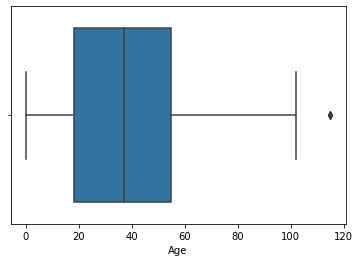

In [30]:
sns.boxplot(data= cleaned_training, x='Age')
plt.show()

# Drop Outliers

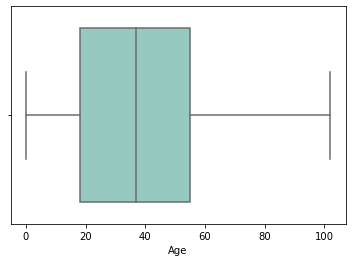

In [64]:
cleaned_training= cleaned_training.drop(cleaned_training[cleaned_training['Age']==115].index)
sns.boxplot(data= cleaned_training, x='Age')
plt.show()

#### Provide at least one drawing (histogram, pie chart, etc ..) that you see fit, about the dataset.

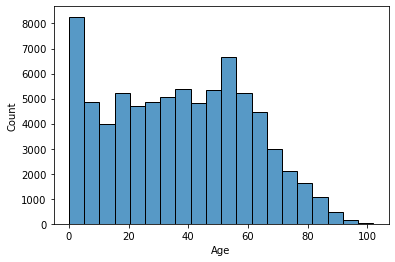

In [43]:
sns.histplot(data= cleaned_training,x='Age', bins=20)
plt.show()

#### Draw a pie chart for show vs no-show appointments.

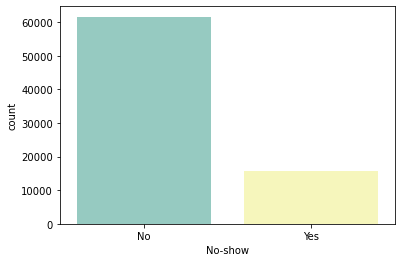

In [65]:
sns.countplot(data= cleaned_training,x='No-show')
plt.show()

In [67]:
cleaned_training['No-show'].describe()

count     77364
unique        2
top          No
freq      61676
Name: No-show, dtype: object

In [68]:
cleaned_training['No-show']= cleaned_training['No-show'].map({'Yes':1,'No':0})
cleaned_training['No-show'].describe()

count    77364.000000
mean         0.202782
std          0.402074
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: No-show, dtype: float64

In [ ]:
plt.pie(cleaned_training['No-show'])
plt.show() 

#### Use One Hot Encoder to encode the gender column.

In [71]:
encoded_df = pd.get_dummies(cleaned_training, columns=['Gender'])
encoded_df.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Gender_F,Gender_M
38517,5,0,0,0,0,0,0,0,1,0
36132,62,1,1,1,0,0,0,0,1,0
20485,19,0,0,0,0,0,0,0,0,1
31508,7,0,0,0,0,0,0,0,1,0
55654,30,0,0,0,0,0,0,0,0,1


#### Use Ordinal Encoder to encode the Neighborhood column.    
One hot encoder would've been better, but we have many features (81) so we can't use it because of the dimensionality. powerful classifiers such as XGBoost can deal with this, but linear ones such as linear regression will suffer.

#### Use label encoder to encode the No-show column.  
The most misused encoder in the whole ML, label encoder and ordinal encoder are exactly the same, but for some stupid reason that nobody knows (if you can find the reason I will give you red bull), sklearn has two versions of it, ordinal encoder for encoding multiple features (the X), and label encoder for encoding a single feature (y). you will see many armatures doing a for loop and using label encoder instead of just using ordinal encoder. ML coding is a mess I know !.

#### Create a new column called late duration.  
Find the date difference in hours or days between the column ScheduledDay and the column AppointmentDay, use it to create the new column, and don't forget to drop the old columns.

#### Split the training data frame into X and y 

#### Train a Preceptron Classifier, tune it's hyperparameters use GridsearchCV.    

#### Print the classification report for the best estimator.  

#### Plot the confusion matrix.  

#### [BONUS] Try other classifiers  
try XGBoost, CatBoost, Light GBM, decision tree and plot the tree, compare between the classifiers, draw a bar plot comparing different classifiers. try a library called Lazy Predict. Try some Auto ML Libraries like PyCaret.   

#### Save the model as a pkl file.


#### [BONUS] SkLearn Pipelines  
If you are able to make this into a single sklearn pipeline (ColumnTransformer-> Onehotencoder -> StandardScaler-> SVM) pkl file, I will give you full mark + bonus + 10 pounds. to get the bonus I need your production code to look like this: `model = pkl.load(model) - model.predict(test set)` all in a single sklearn pipeline, no pandas no nothing.  

# The Production Phase !    

#### Load the test set, do your transformations as you did with the training set. 

#### Load the model from the pkl file, use it to predict on the test set.

#### Print the classification report.  
reflect on the results in terms of F1 score, precision and recall. Is the model overfitting, underfitting and why?

#### Plot the confusion matrix, reflect on the results

#### Compare the training accuracy vs test accuracy.
reflect on the results, is your model underfitting or overfitting? and why?.  
Draw a bar plot comparing the two.  

#### [BONUS] Can you plot the decision boundaries for 2 features?  
Hint: steal some code form the internet, google: python plot decision boundary or ask chatGPT

#### [BONUS++++] Deployment  
Can you deploy this? use your .edu email to create a free azure for students account. think of fast API, Flask with Azure web service or just python function with Azure Functions (like AWS Lambda) call your API using Postman.  

# The End
Congratulations, you made it this far, upload the project to github, add it to your CV.